In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from preferential_returns_model import Person
from lattice_model import Lattice, Coordinate, Offset
from lattice_visualisation import plot_lattice, plot_trajectories, plot_person_distribution
import numpy as np

# Preferential returns model
We have a hexagonal lattice, and I set the total distance between two adjacent hexagons as 1km.



In [4]:
base_geometry = Lattice(width=50)

## Sample a single trajectory

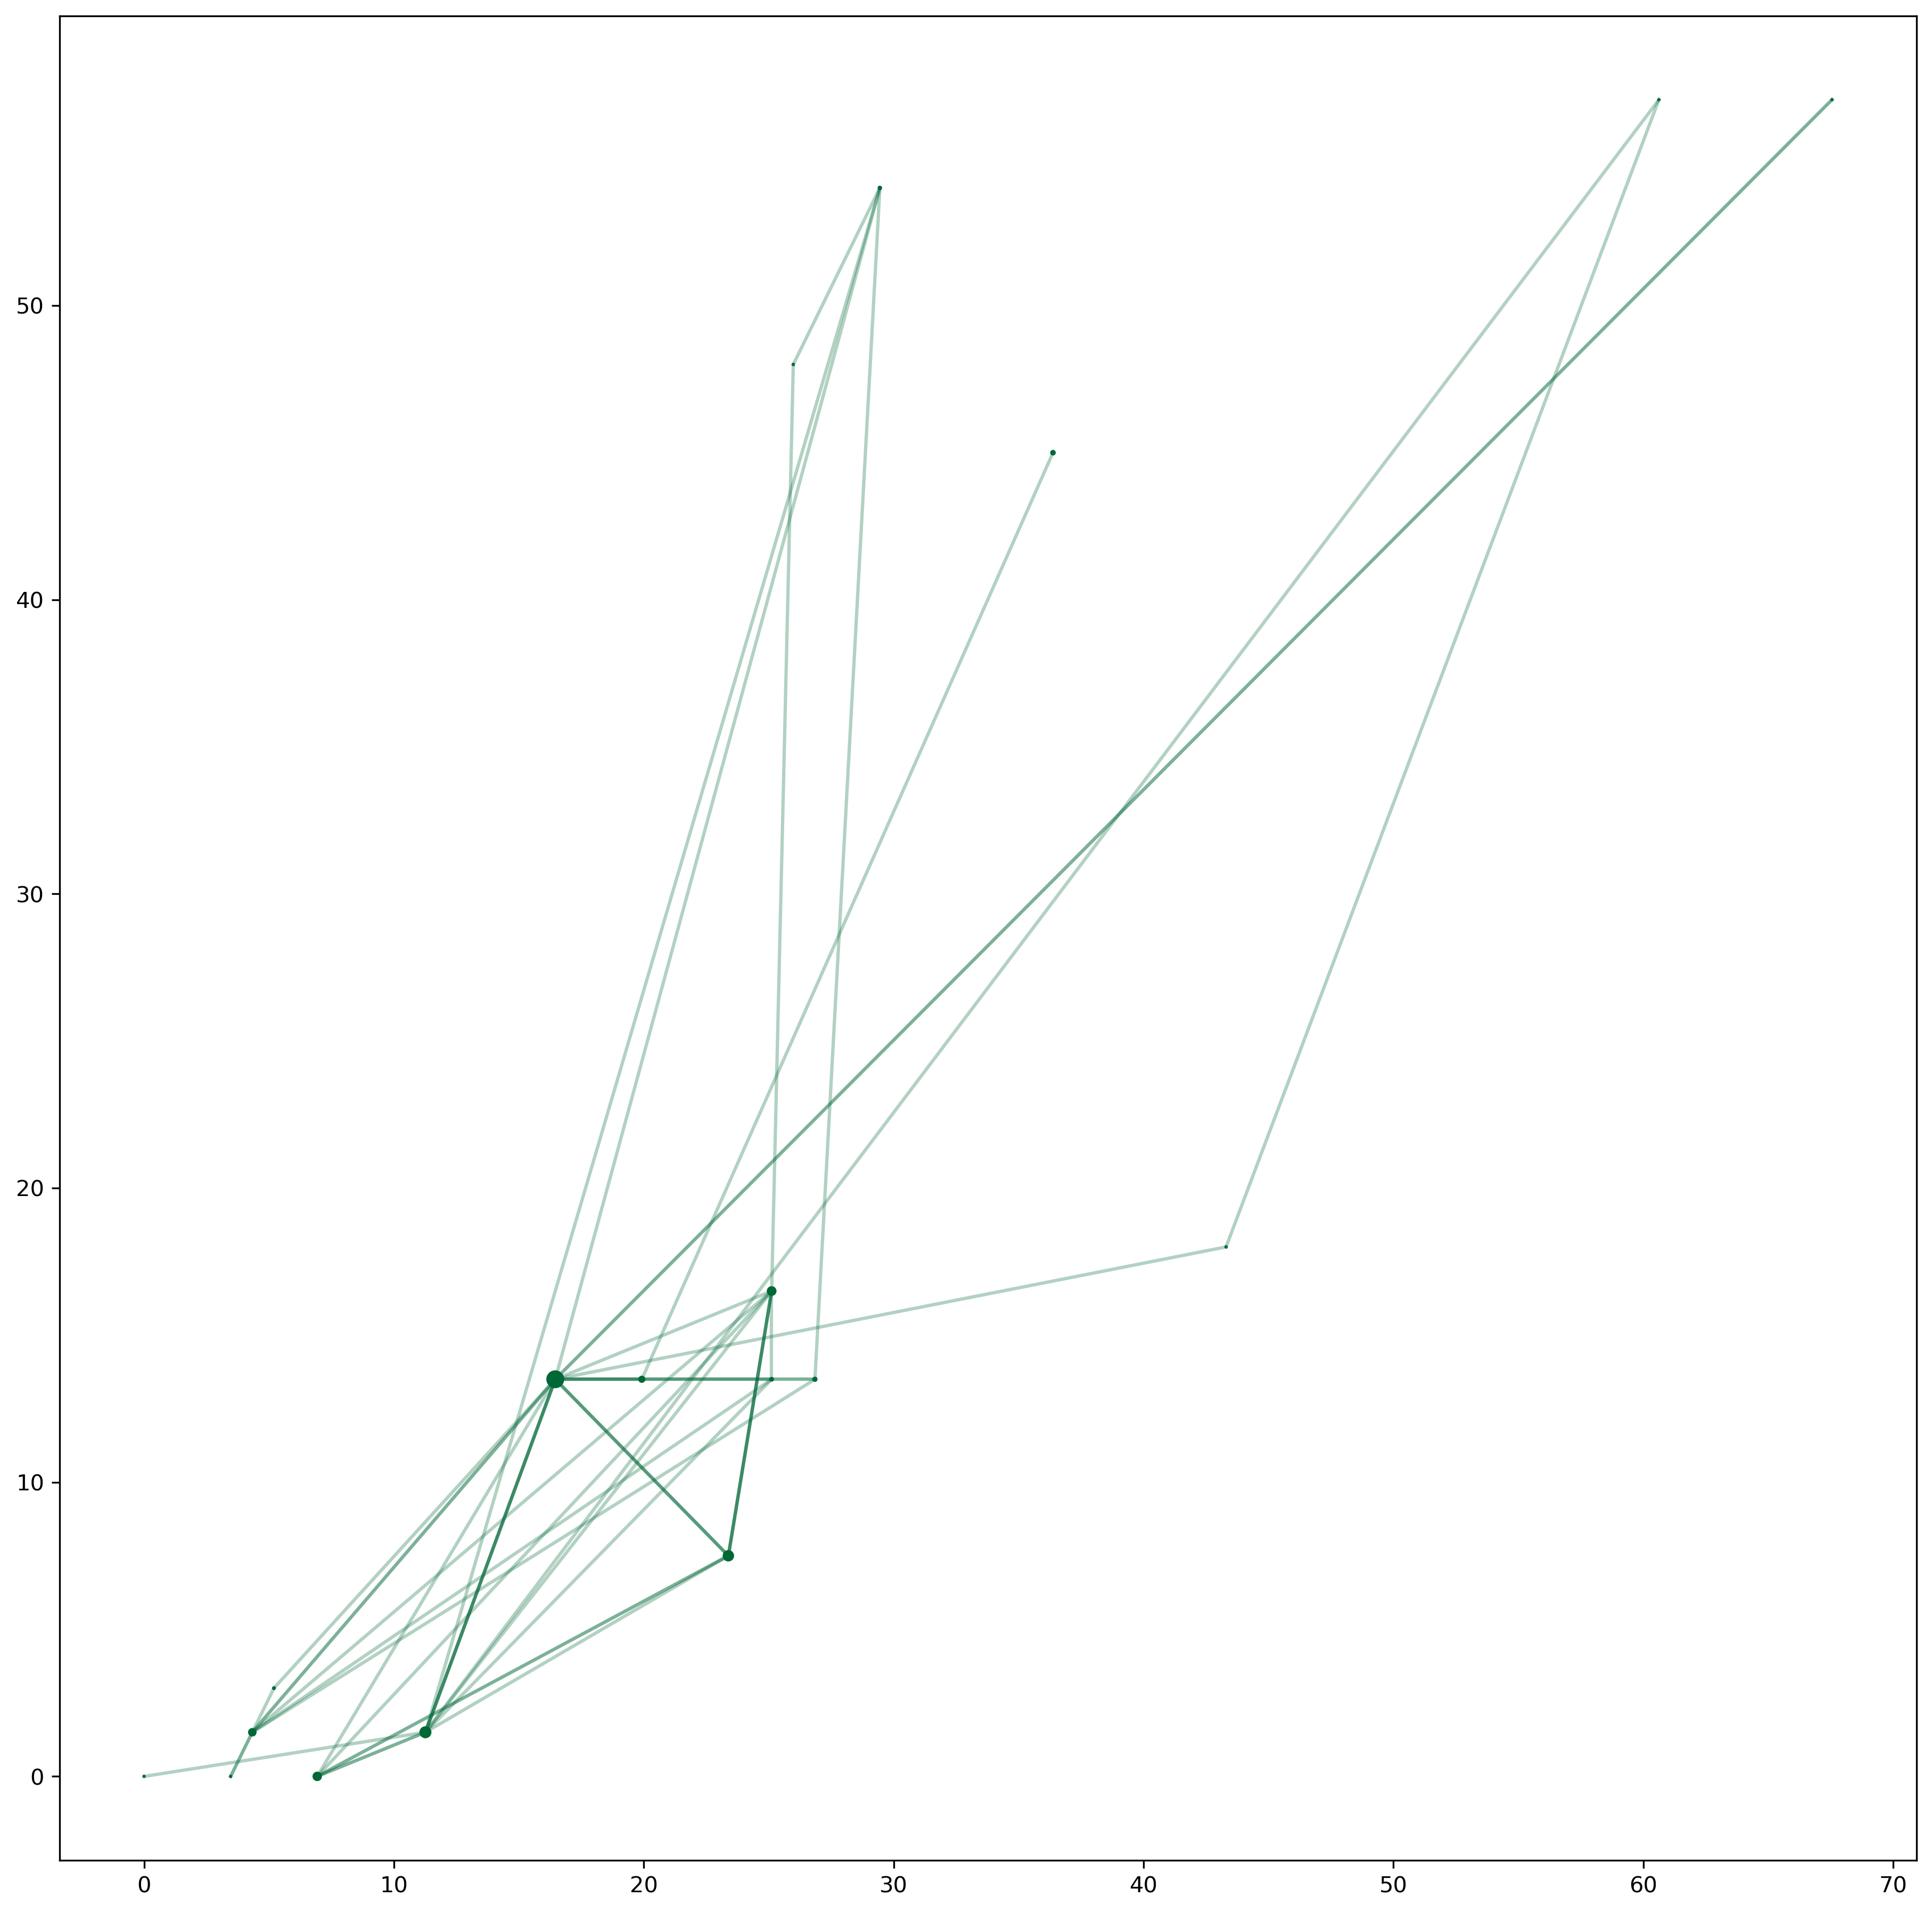

In [5]:
person = Person(lattice=base_geometry, seed=Coordinate(offset=Offset(0, 0)))
person.run(500)
plot_trajectories([person])

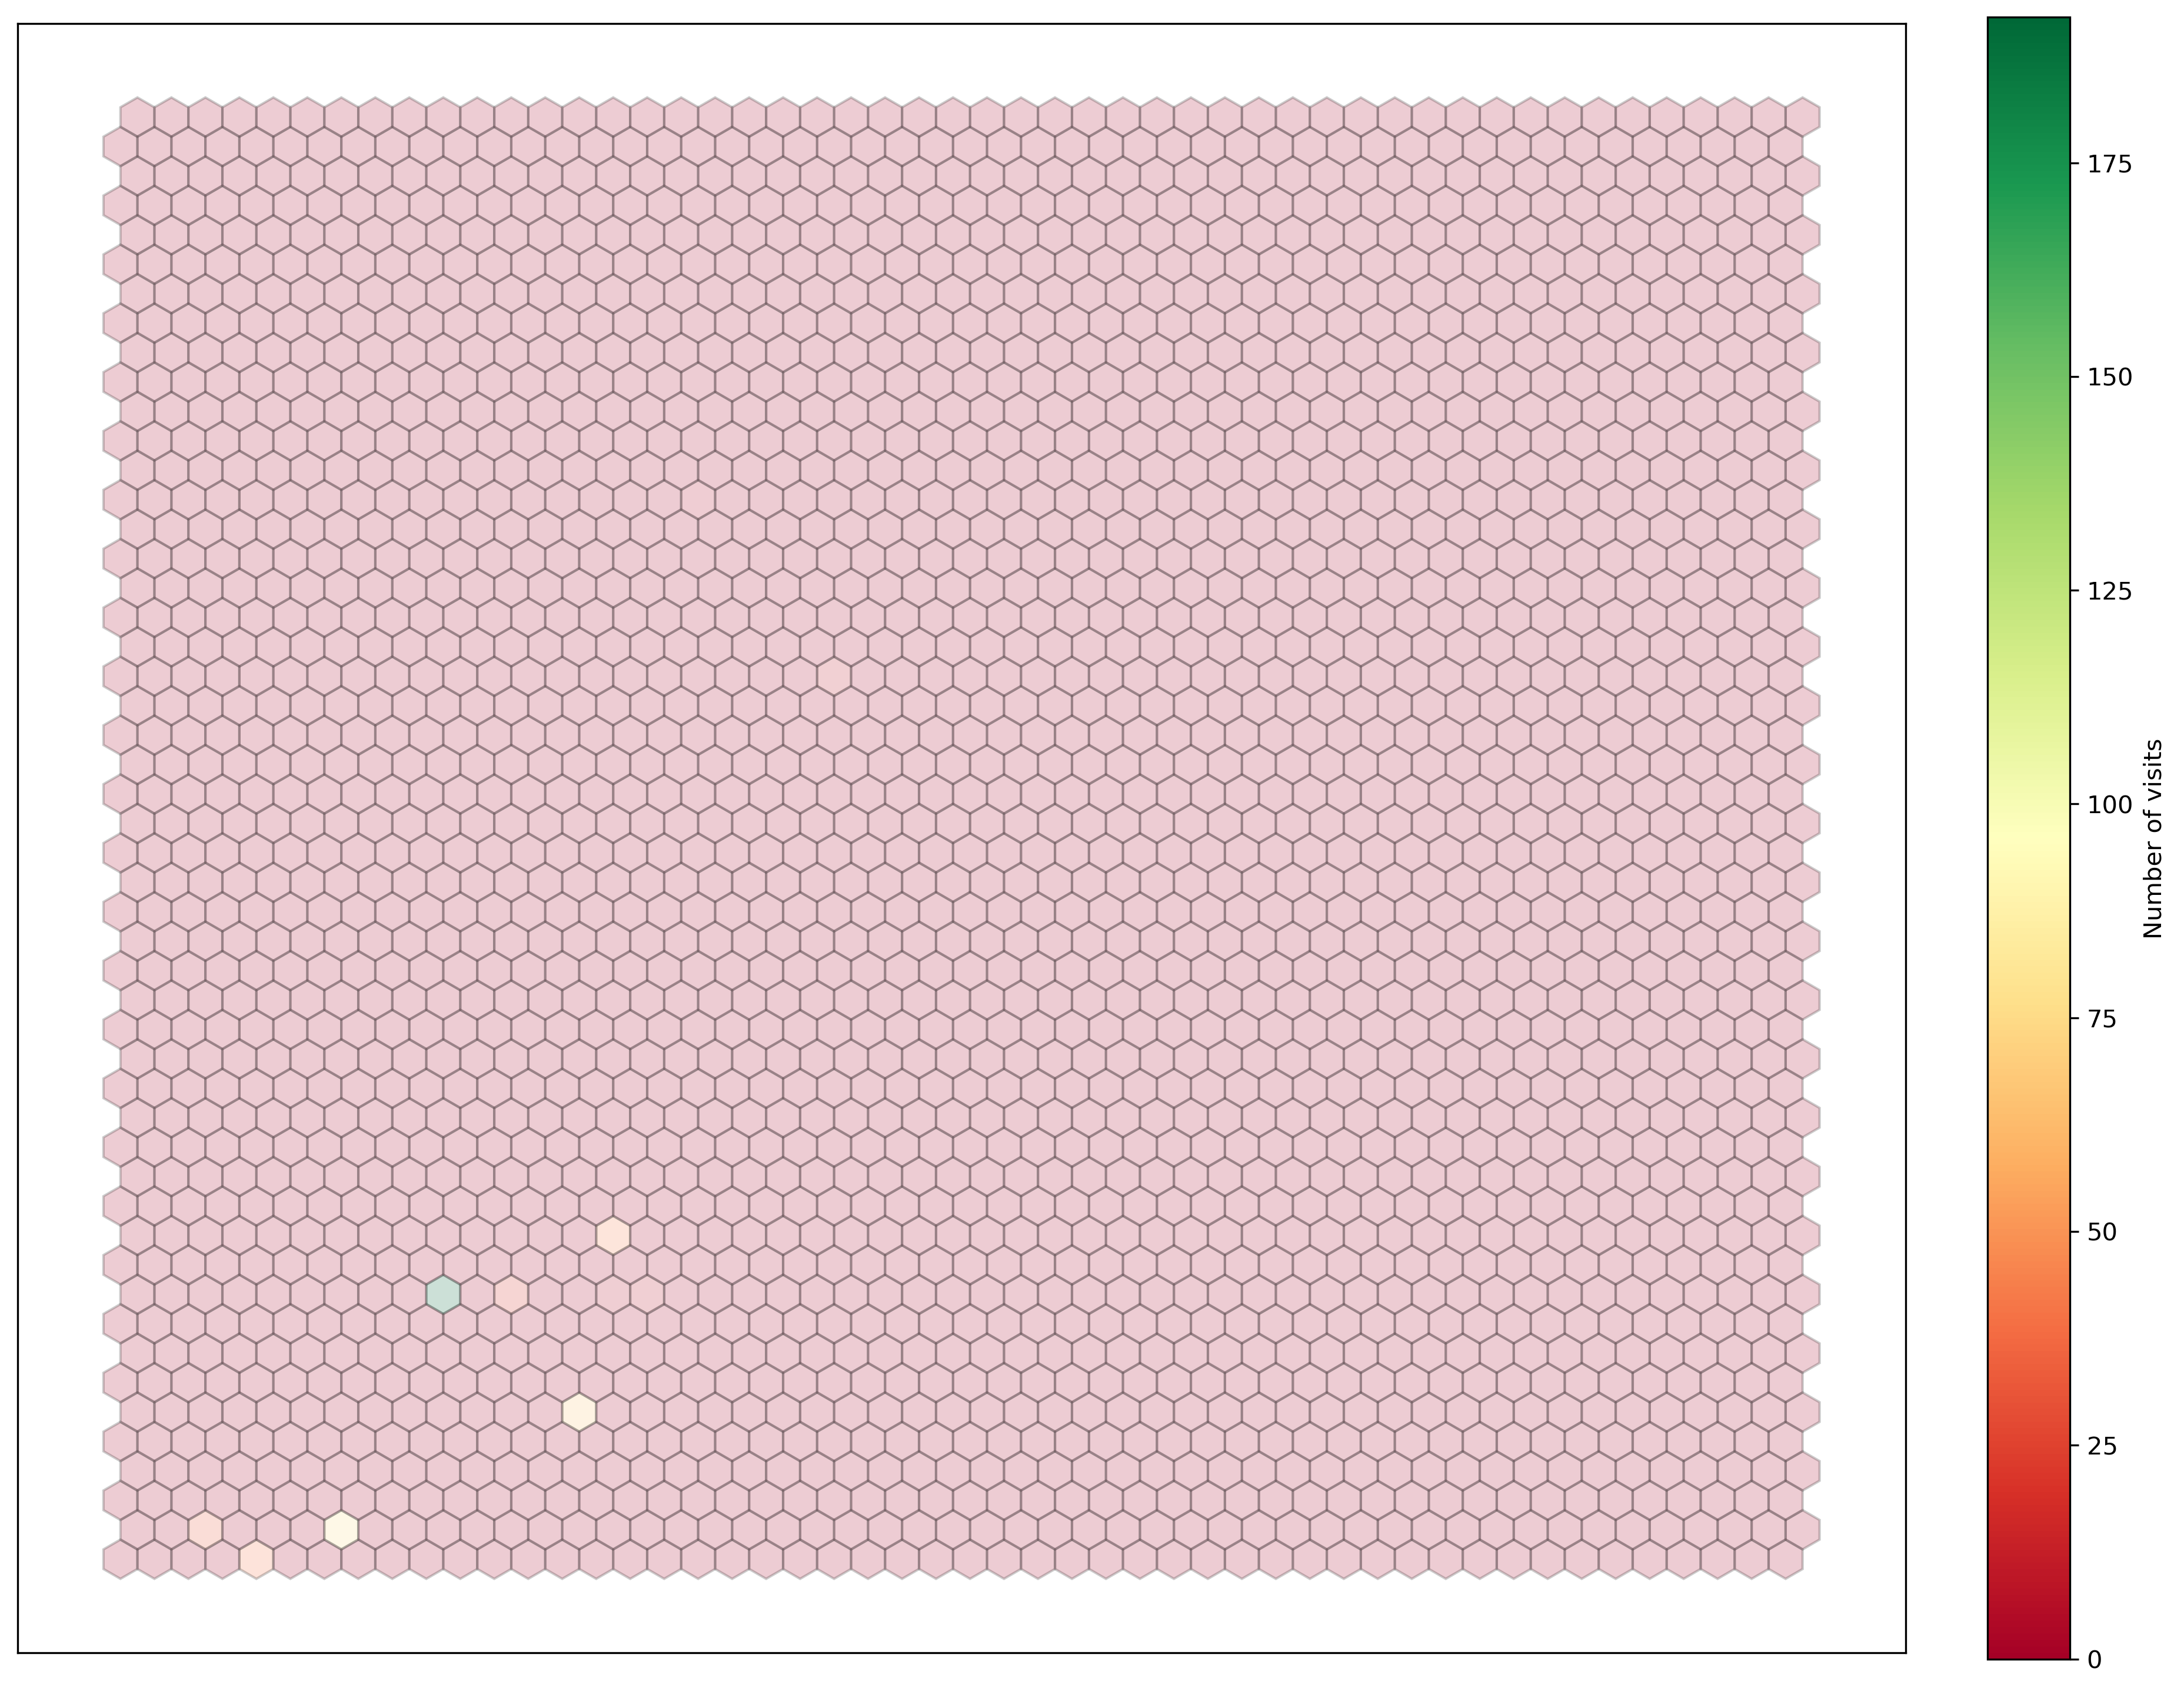

In [6]:
plot_lattice(base_geometry.count_visits([person]))

/Users/joel/PycharmProjects/ABM/truncated_levy.py:48: RuntimeWarning: divide by zero encountered in power
  return (self.x0 + x) ** (-self.beta) * np.exp(-x / self.k) / self.A


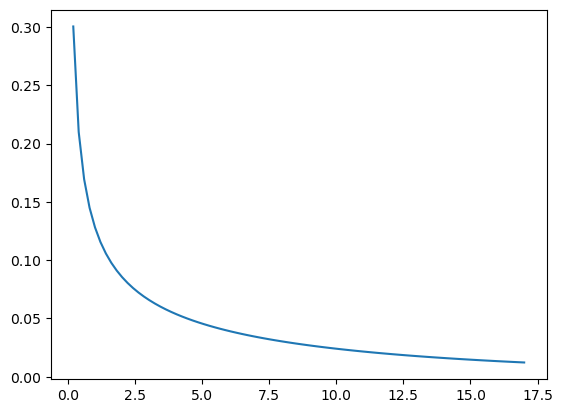

In [7]:
plot_person_distribution(person, 'time_distribution', 17)

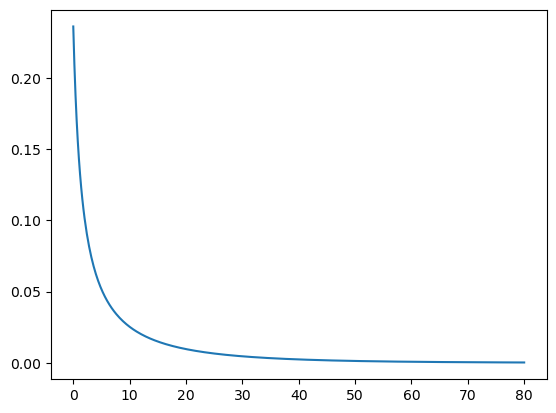

In [8]:
plot_person_distribution(person, 'length_distribution', 80)

# Simulate randomly placed people

In [15]:
number_of_people = 10000
number_of_steps = 600
seeds_raw = np.array([np.random.randint(0, base_geometry.r, size=number_of_people),
                      np.random.randint(0, base_geometry.c, size=number_of_people)]).T
seed_coords = [Coordinate(offset=Offset(*i)) for i in seeds_raw]

In [10]:
people = [Person(lattice=base_geometry, seed=i) for i in seed_coords]
for person in people:
    person.run(number_of_steps)

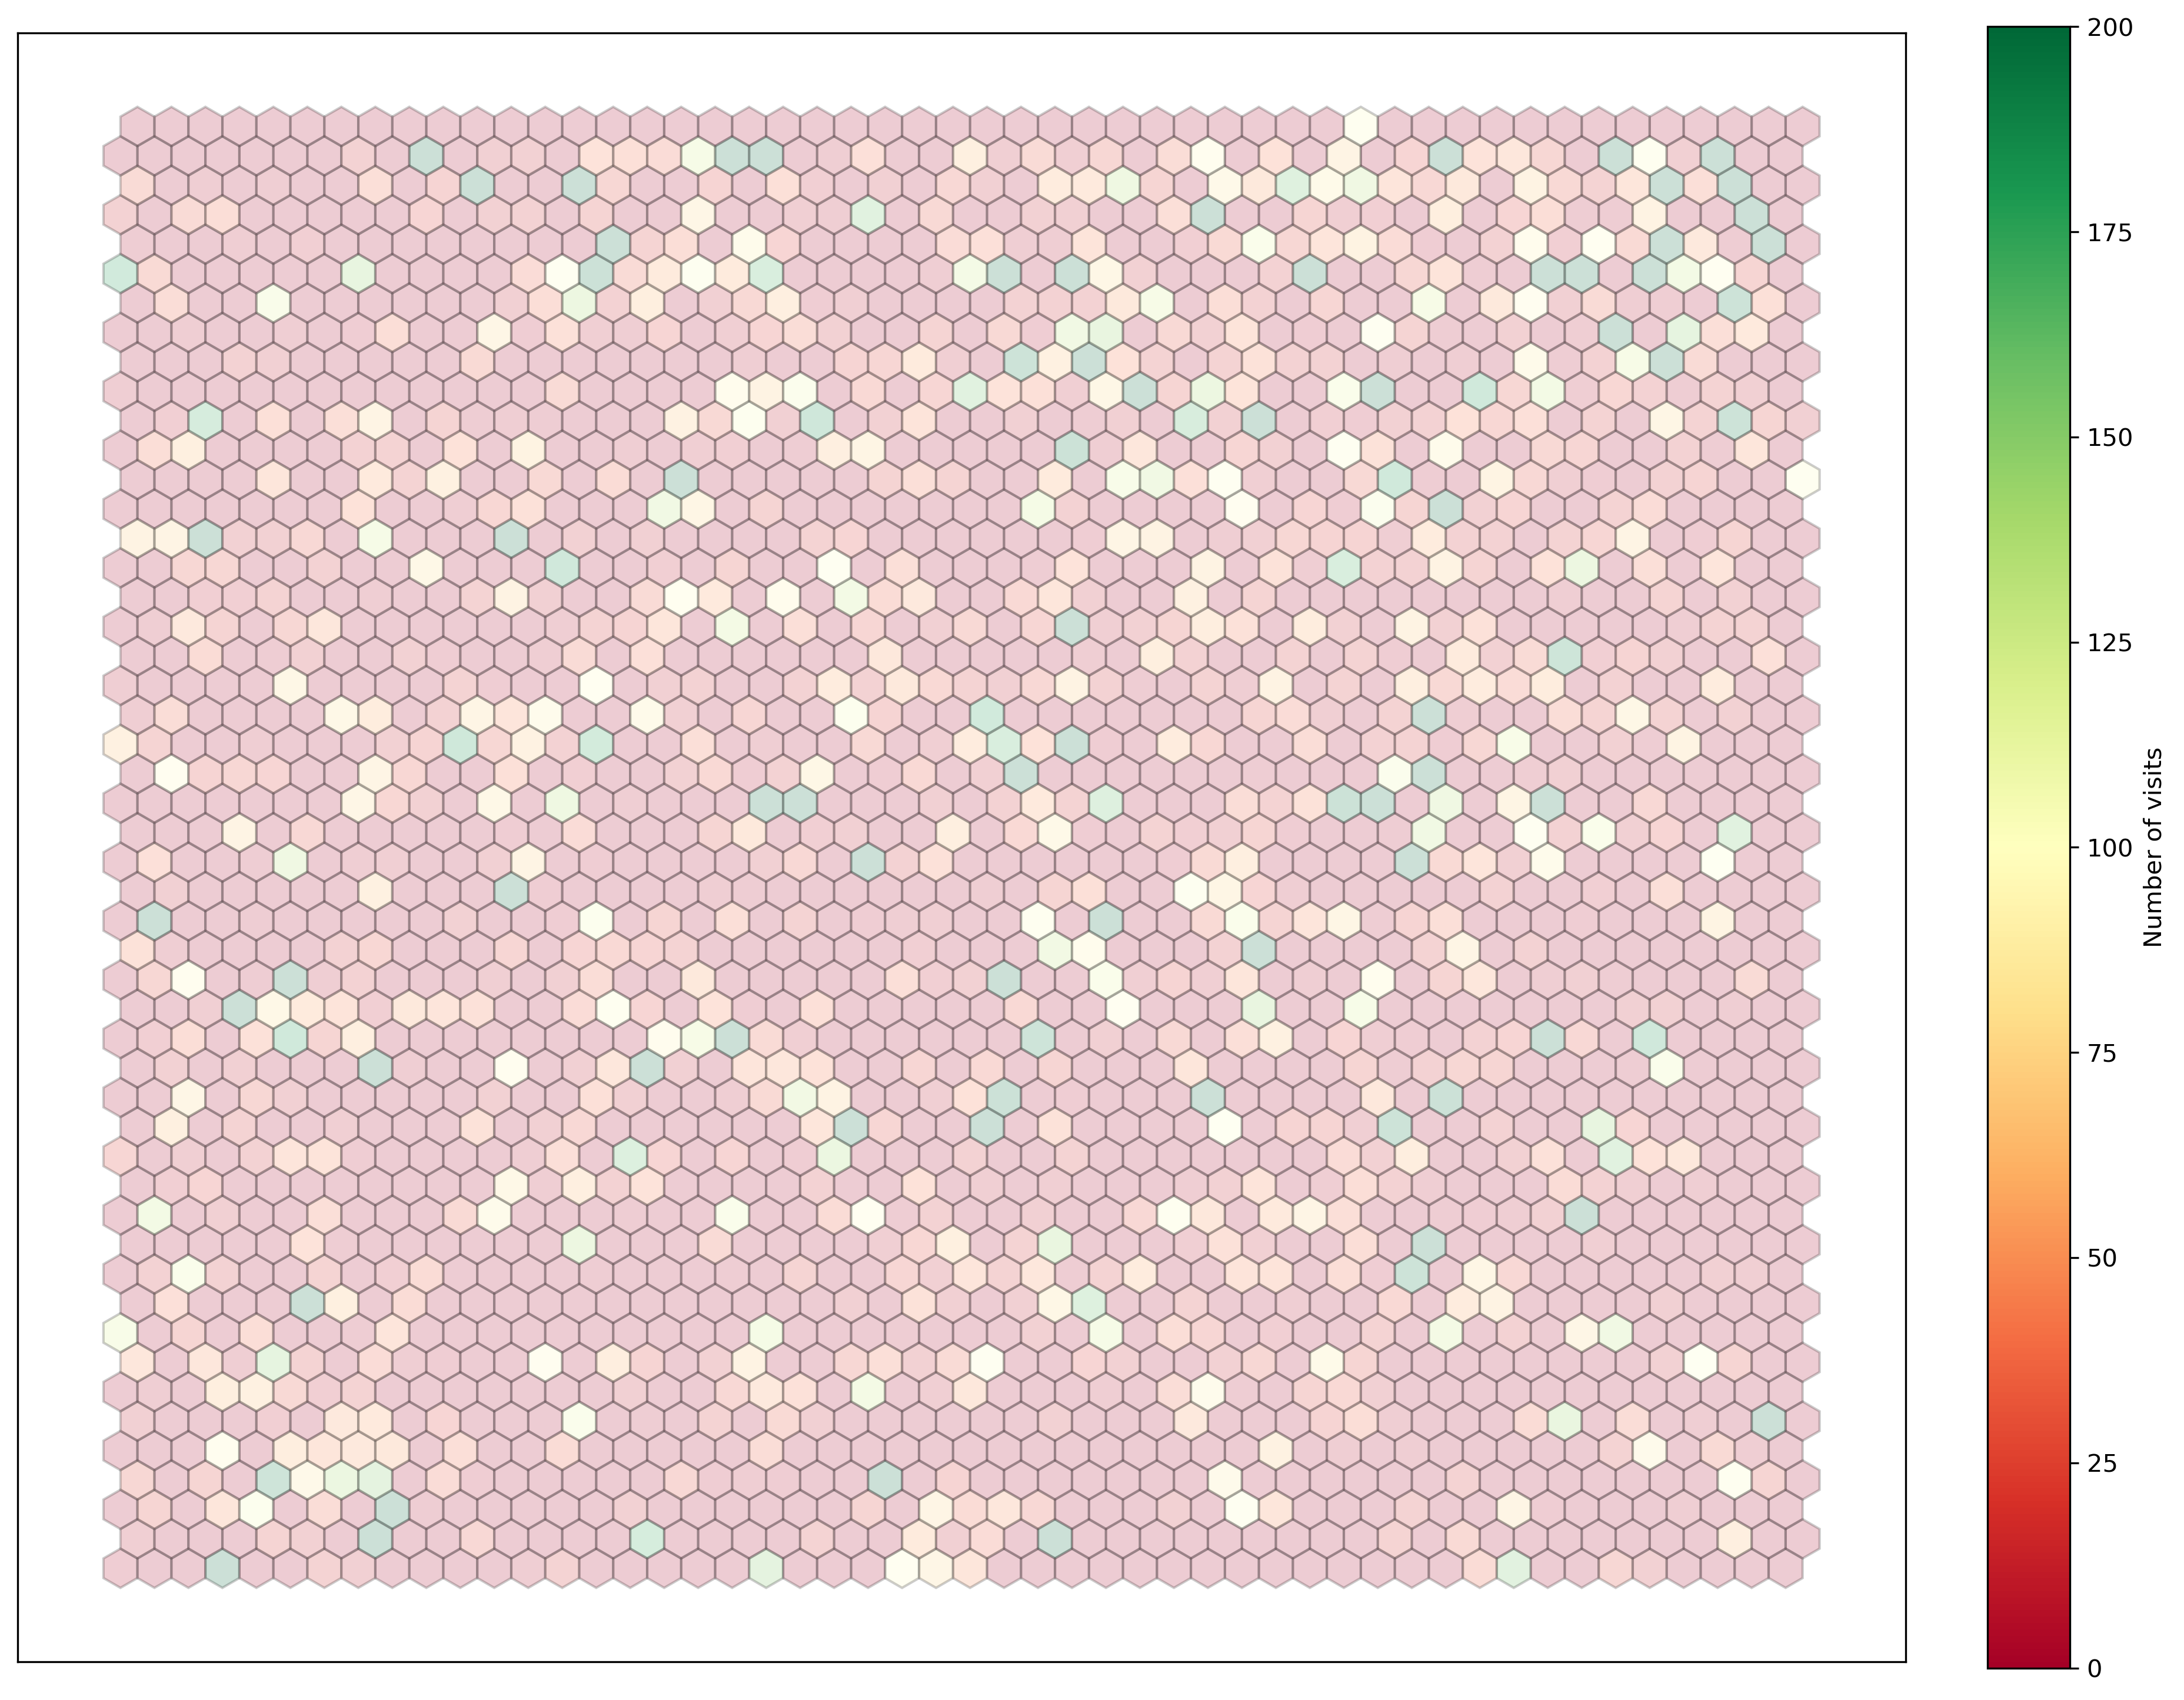

In [11]:
plot_lattice(base_geometry.count_visits(people))

## Seed in same place

In [12]:
people_clump_sizes = [100, 100, 75, 250, 300, 300, 300]
clumped_people = []
for clump in people_clump_sizes:
    seed = Coordinate(Offset(np.random.randint(0, base_geometry.r), np.random.randint(0, base_geometry.c)))
    clumped_people += [Person(lattice=base_geometry, seed=seed) for _ in range(clump)]

origins = base_geometry.count_visits(clumped_people)
for person in clumped_people:
    person.run(number_of_steps)

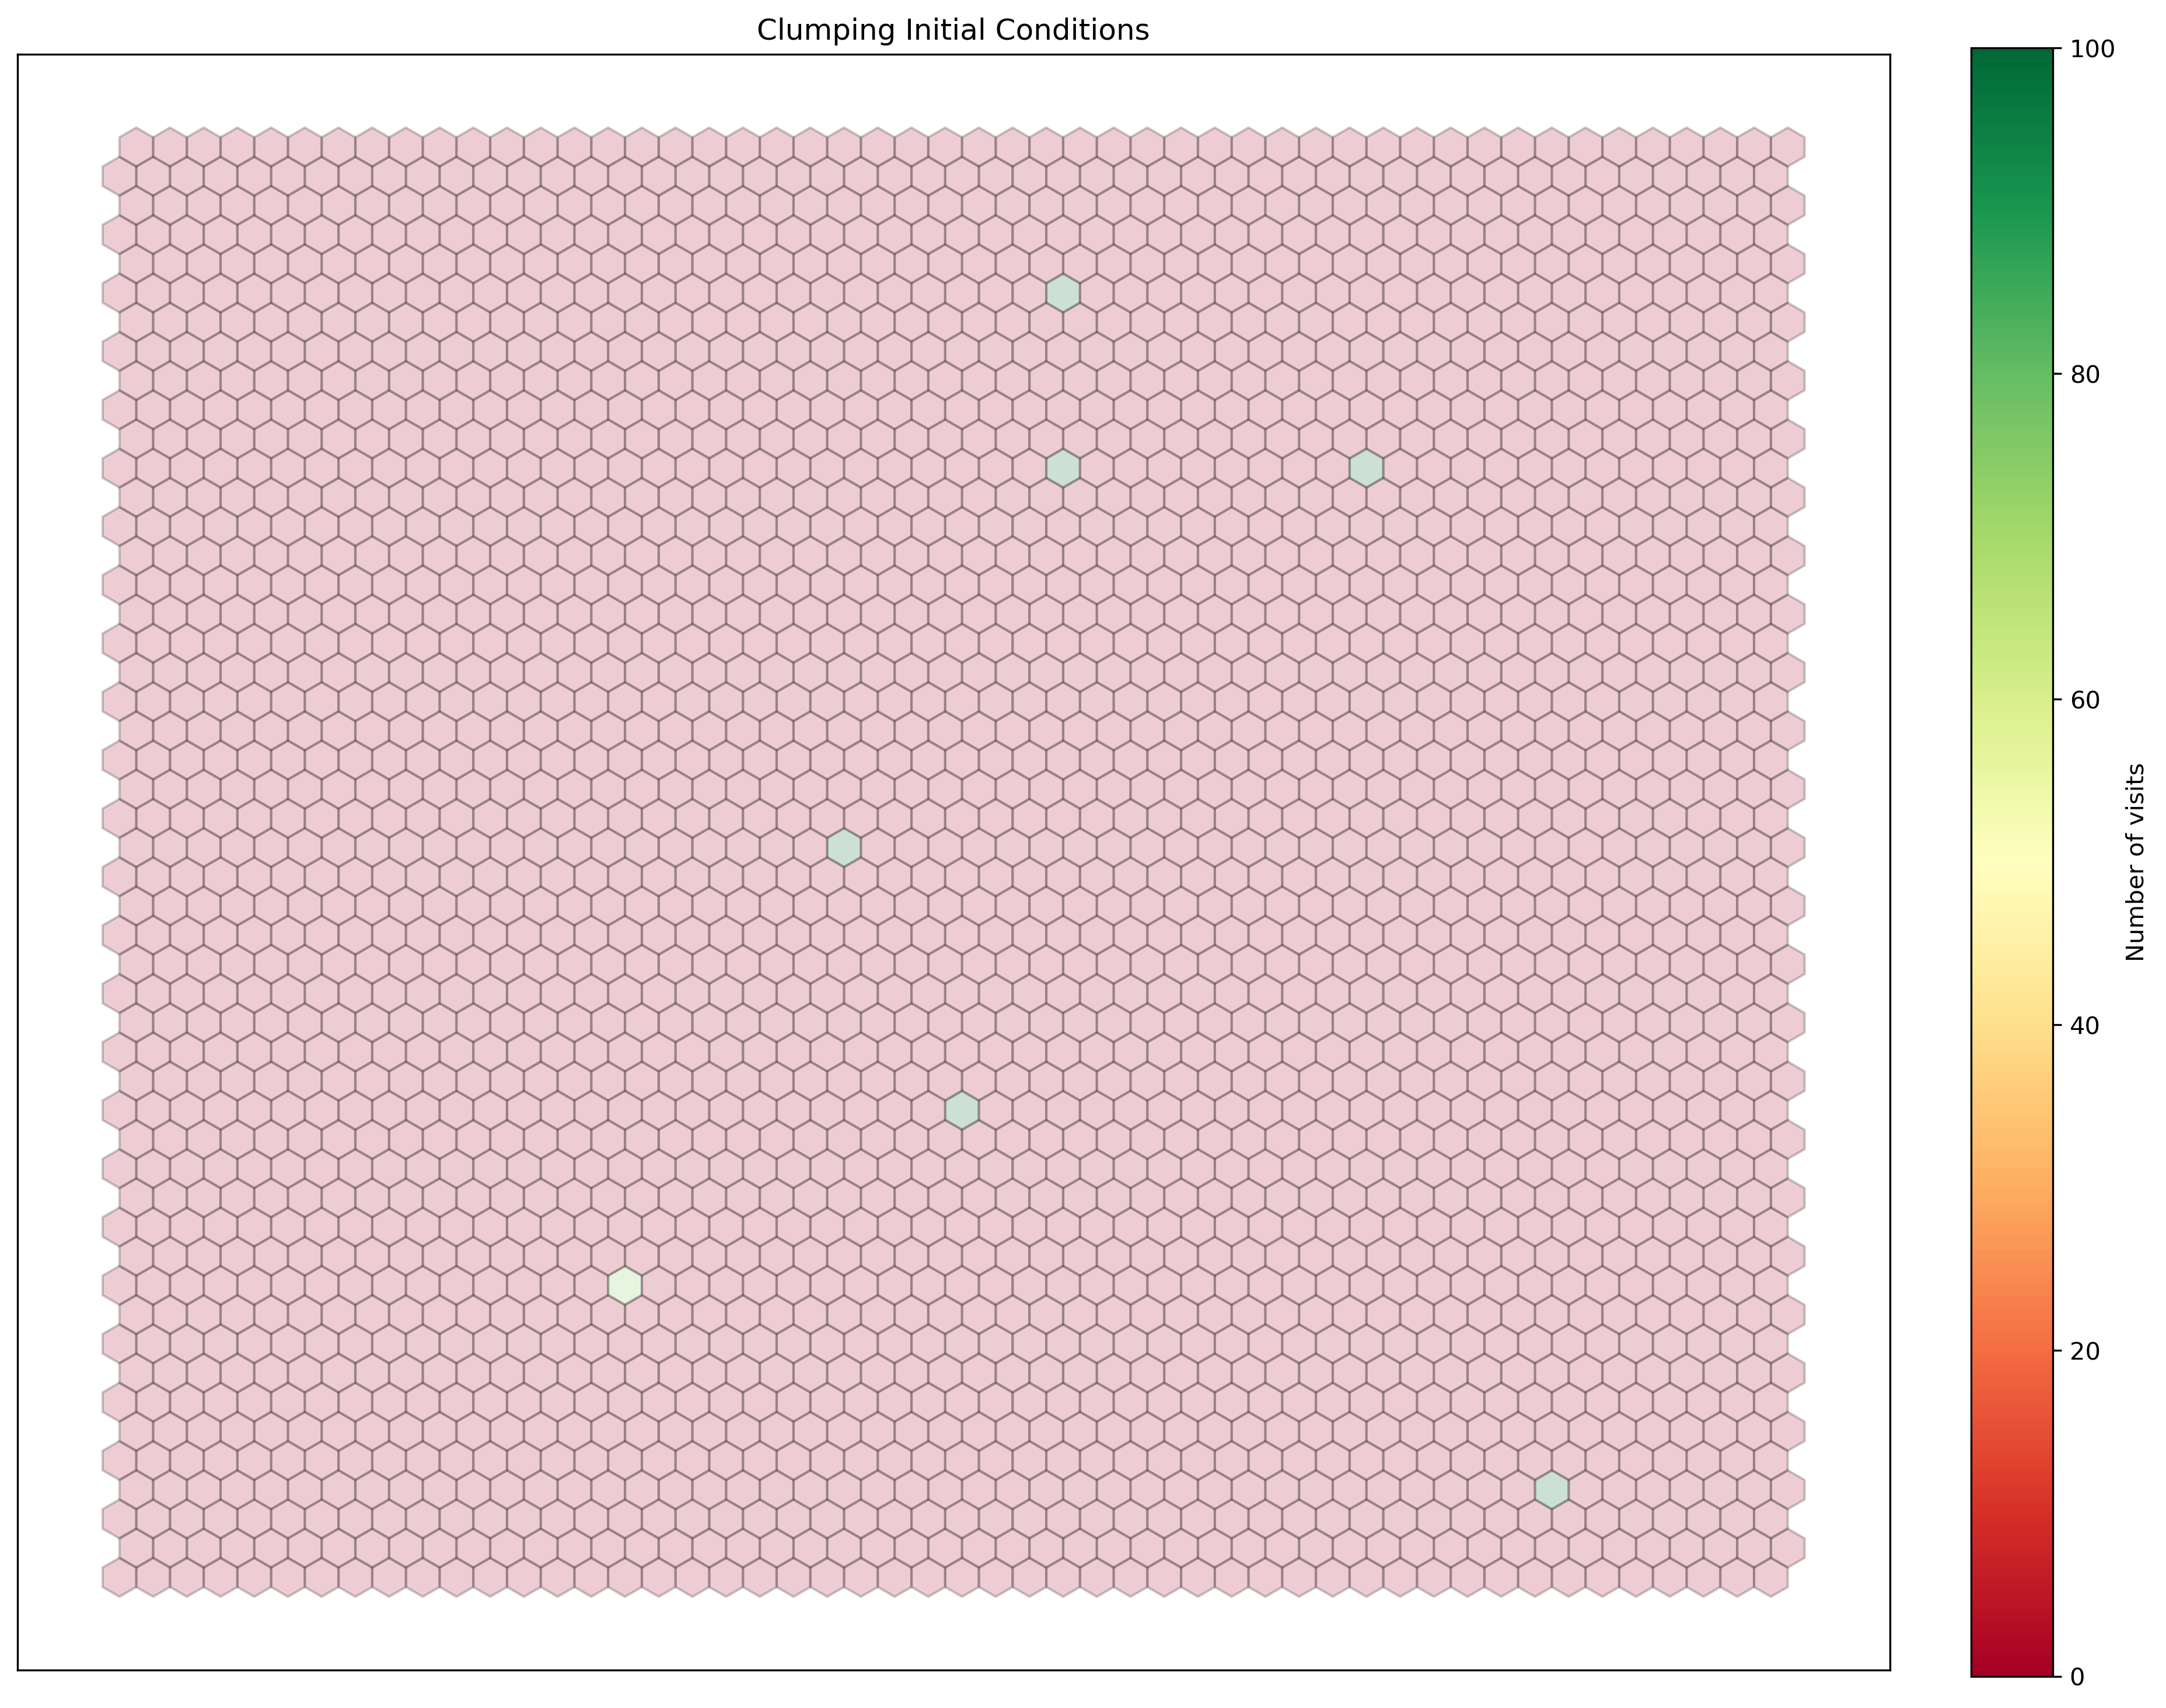

In [13]:
plot_lattice(origins, max_threshold=100, title='Clumping Initial Conditions')

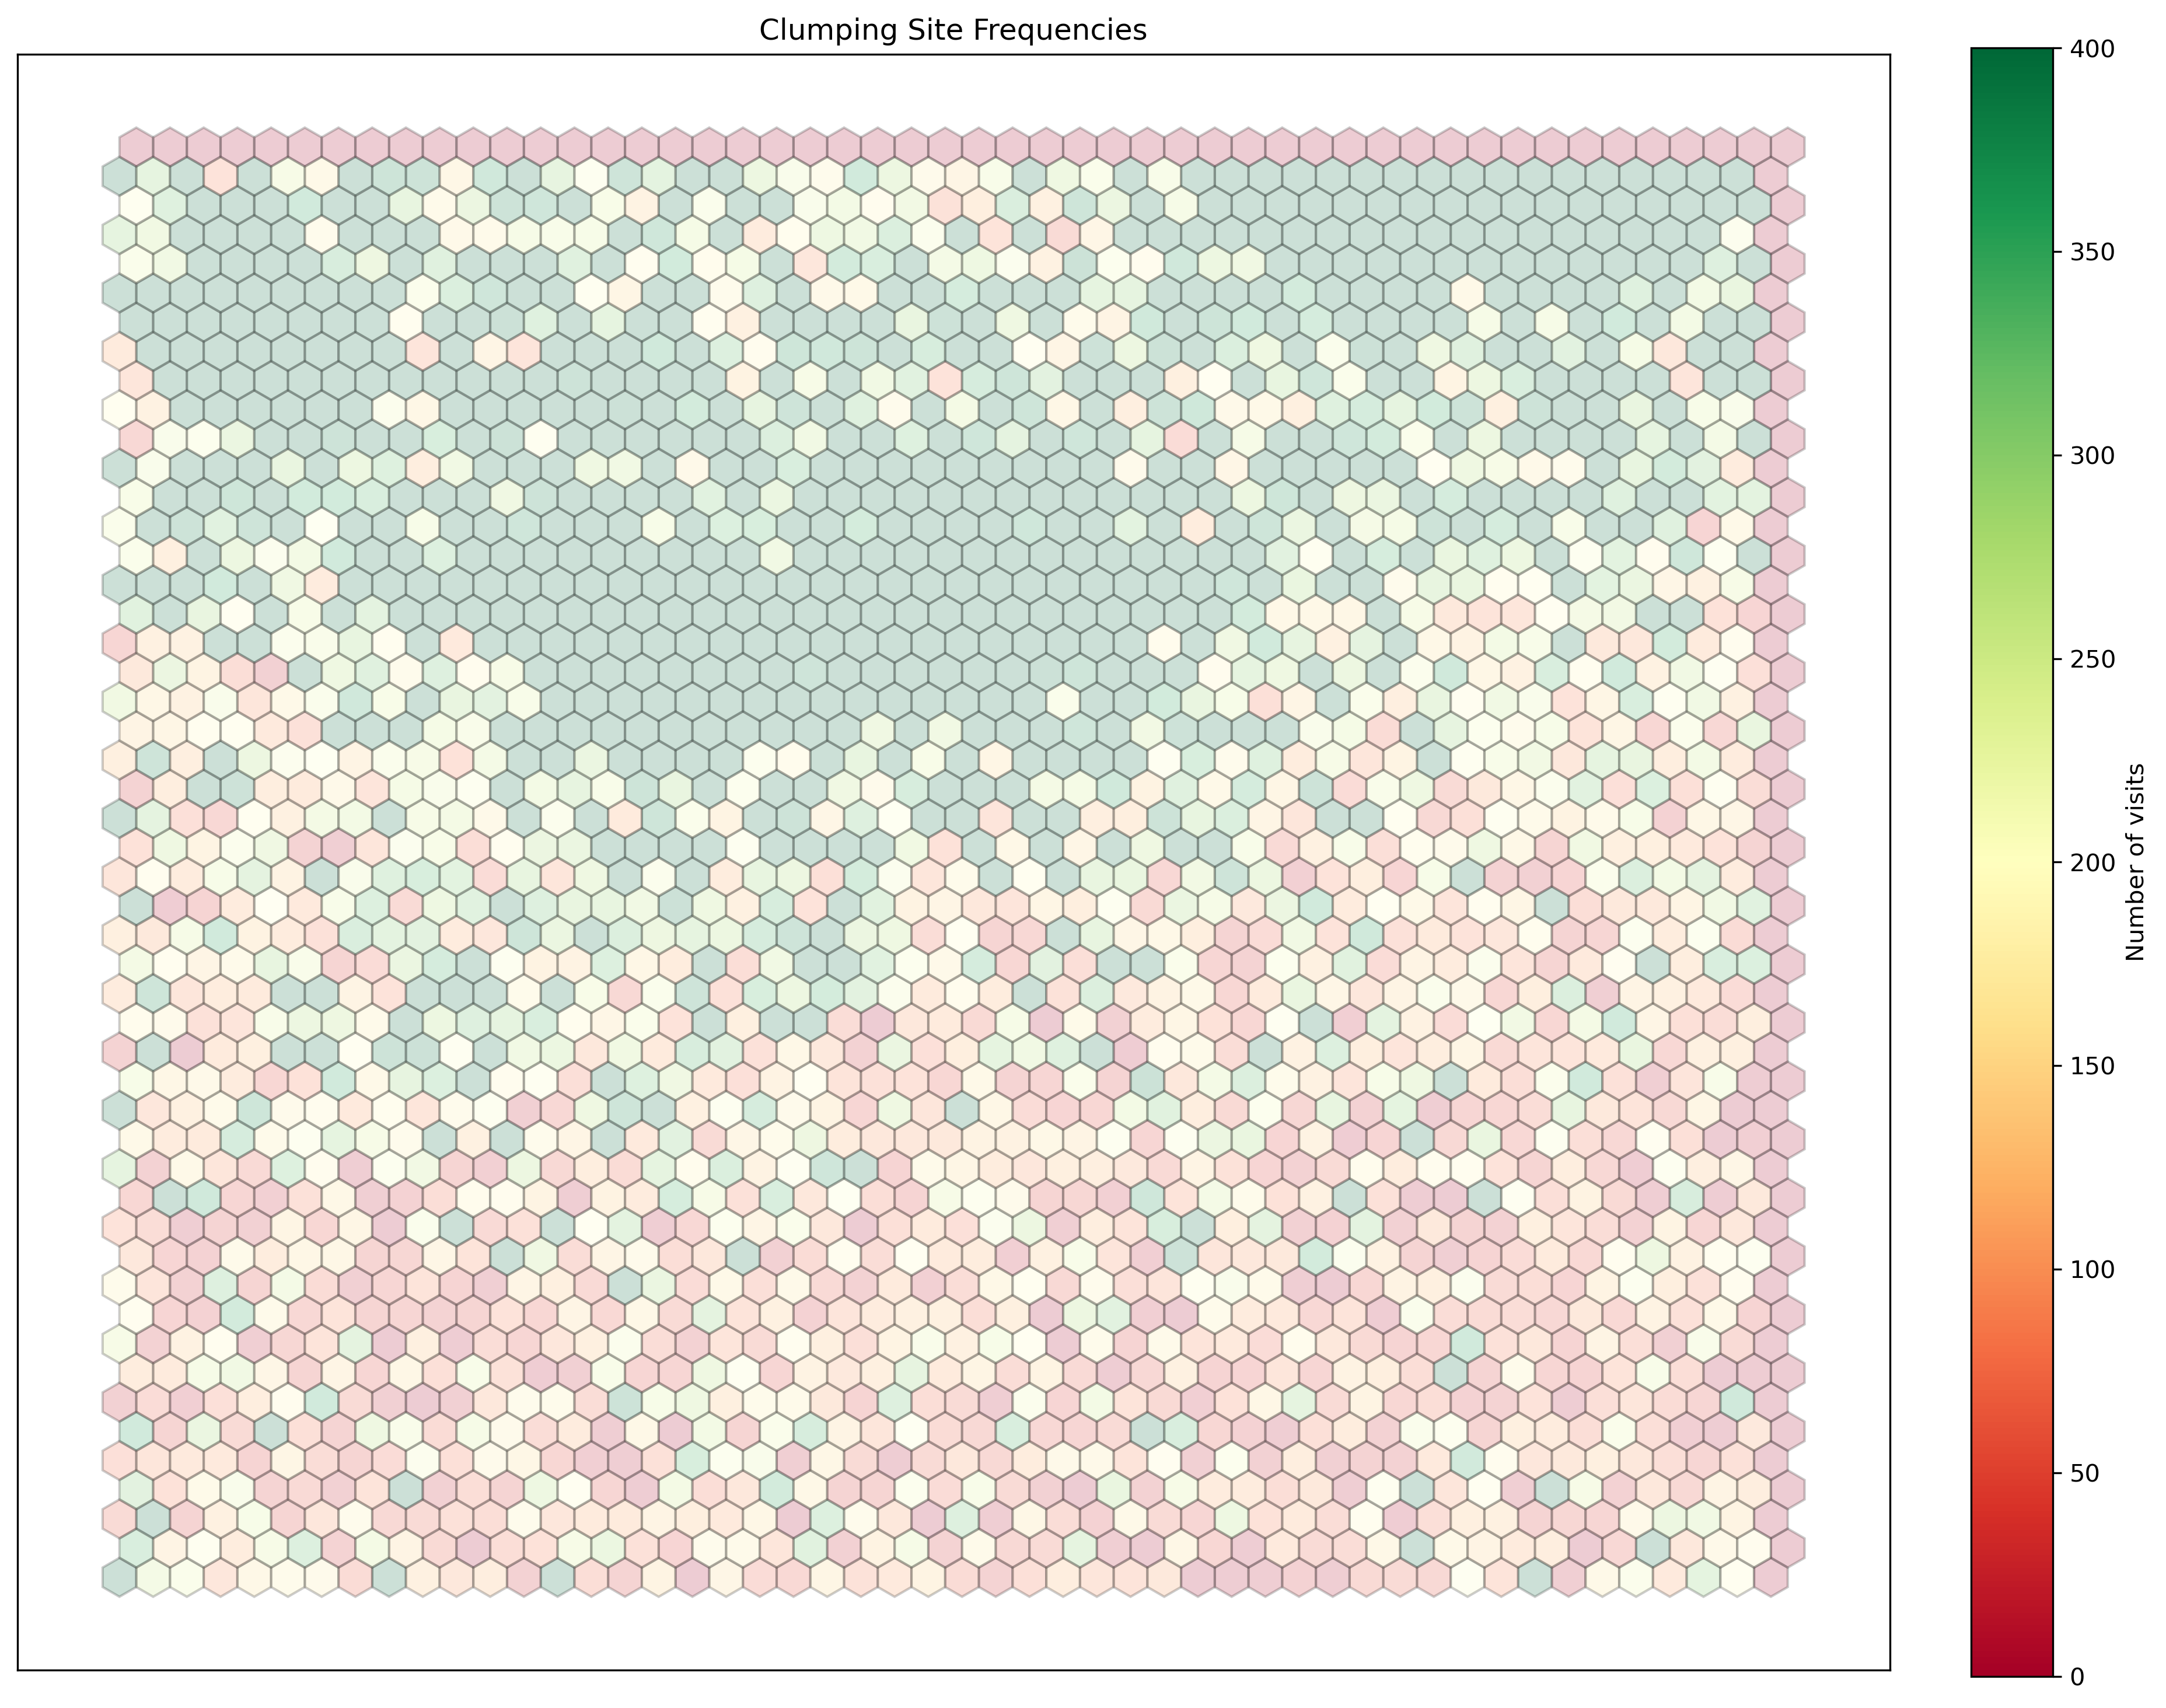

In [14]:
plot_lattice(base_geometry.count_visits(clumped_people), max_threshold=400, title='Clumping Site Frequencies')